# 1 Введение  
## 1.2 Генеральная совокупность и выборка.
- Генеральная совокупность (ГС) — совокупность всех объектов, относительно которых предполагается делать выводы при изучении конкретной задачи
- Репрезентативная выборка – это такая выборка, в которой все основные признаки генеральной совокупности, из которой извлечена данная выборка, представлены приблизительно в той же пропорции или с той же частотой, с которой данный признак выступает в этой генеральной совокупности

Способы формирования выборки
- простая случайная выборка (simple random sample)
- стратифицированная выборка (stratified sample) 
    - разбивка ГС на различные по своей природе страты (группы элементов, которые различаются между собой по определенным признакам)
    - выбор набора элементов из каждой страты
-  групповая выборка (cluster sample)
    - разбивка ГС на кластеры (группы элементов, которые очень похожи между собой)
    - выбор нескольких целых кластеров	

| групповая выборка | стратифицированная выборка |
|---------------------|---------------------|
| Выборка формируется только из нескольких субпопуляций (кластеров)  | Выборка формируется из всех субпопуляций (страт) |
| В пределах кластера элементы должны быть разнородны, тогда как между разными кластерам поддерживается однородность или схожесть| В пределах страты элементы должны быть однородны, а между стратами должна быть разнородность (различия)|
| Схема выборки нужна только для кластеров, попавших в выборку | Должна быть сформирована полная схема выборки для всех стратифицированных субпопуляций |
| Повышает эффективность выборки, уменьшая стоимость | Повышает точность |

In [3]:
# подключение библиотек

from fractions import Fraction # работа с рациональными числами (в виде обыкновенной дроби)
import random                  # генерация случайных значений
import pandas as pd            # для работы с данными
import numpy as np             # мат.алгоритмы для работы с многомерными массивами
import scipy                   # набор мат.алгоритмов и вспомогательных функций, созданных на основе Numpy

# Для построения графиков
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns


In [4]:
# формирование массива целых чисел - назовем ее генеральная совокупность

array_number = []
n = 10000                      # кол-во чисел в генеральной совокупности
limit = 1000                   # верхний и нижний предел значений чисел в генеральной совокупности 

for i in range(n):
    array_number.append(random.randint(-limit, limit))

print(array_number[:10])       # вывод первых 10 чисел для примера

[-434, -750, -669, 36, 286, 661, 260, -916, -179, -419]


In [5]:
# формирование простой случайной выборки

# sample - возвращает случайно выбранные элементы из этой последовательности
sample_size = 1000
random_sample = random.sample(array_number, sample_size) 

print("Случайная выборка ({} элементов) из генеральной совокупности: \n".format(sample_size), random_sample[:10])

Случайная выборка (1000 элементов) из генеральной совокупности: 
 [596, -806, 934, -909, 15, -445, 252, 695, -150, 446]


In [7]:
# формирование стратифицированной выборки
# разобьем на две страты (отрицательные и неотрицаткльные числа)

strata = [[x for x in array_number if x >= 0], [x for x in array_number if x < 0]]

sample_size_per_stratum = 500 # размер выборки из каждой страты
strata_size = 2               # кол-во страт

# Формирование стратифицированной выборки
stratified_sample = []
for stratum in strata:
    stratified_sample.extend(random.sample(stratum, sample_size_per_stratum))

# Вывод стратифицированной выборки
print("Стратифицированная выборка ({} элементов) из рациональных чисел:\n".format(sample_size_per_stratum * strata_size), stratified_sample[:10])

Стратифицированная выборка (1000 элементов) из рациональных чисел:
 [517, 717, 526, 248, 364, 477, 271, 74, 409, 365]


Характеристики генеральной совокупности:
- Количественные - измеряемые
    - непрерывные
    - дискретные
- Качественные (номинативные) - разделение испытуемых на группы, цифры как маркеры (например: 1 -женщины, 2 – мужчины)  Цифры как имена групп, не для расчетов 
- Ранговые - похоже на номинативные, показатель для сравнения (быстрее/медленнее и т п.)

**Описательная статистика** - раздел статистики, который описывает и систематизирует основные характеристики данных путем использования различных методов, графиков и числовых показателей. 
Цель описательной статистики - предоставить краткое и информативное описание набора данных, чтобы лучше понять их распределение, центральные тенденции, разброс и другие важные свойства.

**Гистограмма частот** - это графическое представление распределения частоты встречаемости значений в наборе данных.

_Предлагаю для интереса начать исследовать набор реальных данных, поэтому дальше я буду работать с данными о кредитной истории различных людей_ 

In [9]:
# загрузка данных из файла XLSX
df = pd.read_excel('CreditScoreData.xlsx')

# вывод данных
df.head()  #df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,320,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
1,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,323,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
2,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,324,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
3,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,326,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
4,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,26.544229,207,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,Standard


In [10]:
print('Количество строк {}, количество уникальных строк {}\n'.format(len(df), df['Monthly_Inhand_Salary'].nunique()))

df.info() # df.dtypes - возвращает тип данных каждого столбца
df.shape  # возвращает кортеж, показывающий количество строк и столбцов в датафрейме

Количество строк 23929, количество уникальных строк 10982

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23929 entries, 0 to 23928
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         23929 non-null  object 
 1   Customer_ID                23929 non-null  object 
 2   Month                      23929 non-null  object 
 3   Name                       23929 non-null  object 
 4   Age                        23929 non-null  int64  
 5   SSN                        23929 non-null  object 
 6   Occupation                 23929 non-null  object 
 7   Annual_Income              23929 non-null  float64
 8   Monthly_Inhand_Salary      23929 non-null  float64
 9   Num_Bank_Accounts          23929 non-null  int64  
 10  Num_Credit_Card            23929 non-null  int64  
 11  Interest_Rate              23929 non-null  int64  
 12  Num_of_Loan                23929 non-null  

(23929, 28)

In [11]:
df.isna().sum() # функция isna проверяет каждую ячейку и возвращает True для ячеек с отсутствующим значением

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 2526
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age_Months       0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

Occupation
Lawyer           1687
Accountant       1652
Mechanic         1648
Teacher          1642
Engineer         1631
Architect        1614
Media_Manager    1598
Scientist        1590
Developer        1589
Doctor           1582
Musician         1575
Journalist       1567
Entrepreneur     1552
Manager          1508
Writer           1494
Name: count, dtype: int64


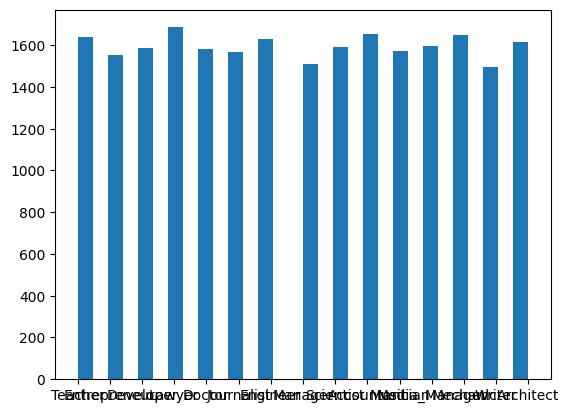

In [39]:
# построение графика примера номинативной переменной (Occupation)

print(df['Occupation'].value_counts()) # вывод уникальных значений (количество уникальных совпадений в определенной колонке)

plt.hist(df['Occupation'], bins=30);


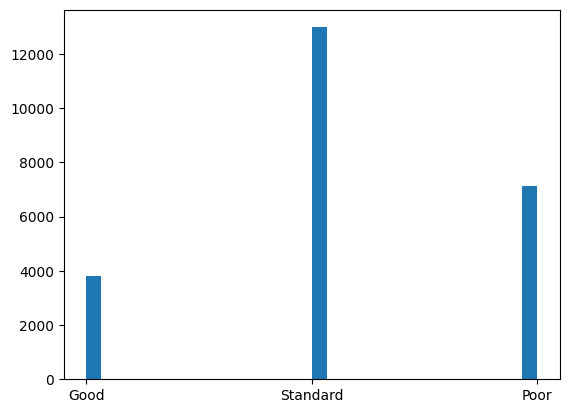

In [38]:
# построение графика примера ранговой переменной(Credit_Score) 

plt.hist(df['Credit_Score'], bins=30);

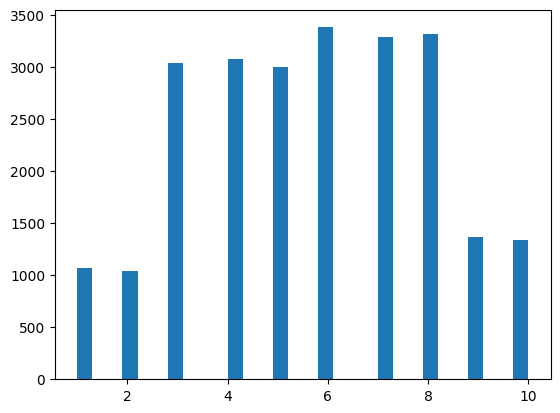

In [37]:
# построение графика примера дискретной переменной (Num_Bank_Accounts)

plt.hist(df['Num_Bank_Accounts'], bins=30);

Text(0, 0.5, 'People')

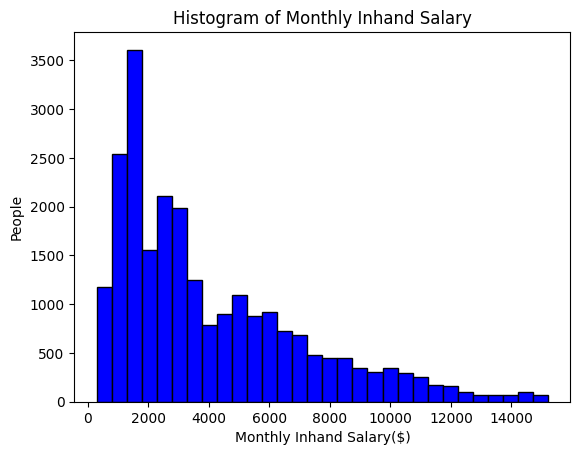

In [41]:
# будем исследовать Monthly_Inhand_Salary - непрырвная переменная

monthly_salary = df['Monthly_Inhand_Salary']

# построим гистограмму
plt.hist(monthly_salary, color = 'blue', edgecolor = 'black', bins = int(150/5)) 
# указываем ширину бина, выраженную в числе бинов
# разбивая этот диапазон на 30 интервалов шириной в 5 единиц

# добавим название
plt.title('Histogram of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary($)')
plt.ylabel('People')

Text(0, 0.5, 'People')

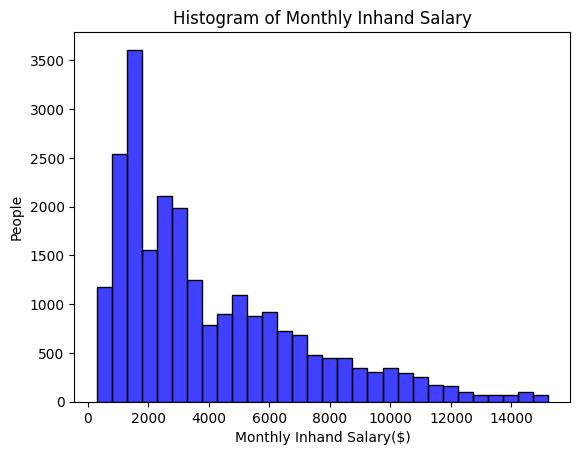

In [78]:

sns.histplot(monthly_salary, kde=False, 
             bins=int(150/5), color = 'blue')

plt.title('Histogram of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary($)')
plt.ylabel('People')

__Меры центральной тенденции__:
- Мода (mode) – значение измеряемого признака, которое встречается максимально часто.
- Медиана (median) – значение признака, которое делит упорядоченное (по
возрастанию/убыванию) множество данных пополам. Если в середине 2 значения
оказываются в случае с как с четными числами, находится среднее
значение этих двух цифр.
- Среднее значение – сумма всех значений измеренного признака делится на
количество измеренных значений. (очень чуствительна к выбросам)

__Унимодальное__ - это распределение имеющее только один максимум (т.е. один 'пик'). Типичный
пример - это нормальное распределение  
__Бимодальное (мультимодальное)__ - это распределение, котрая имеет два или несколько максимумов  

*Симметричное/Ассимтричное распределение (по типу гистограммы)*

__Св-ва среднего значения__
$$1) M_{x+c} = M_{x} + c$$
$$2)M_{x*c} = M_{x} * c$$
$$3)\sum (x_i - M_{x}) = 0$$

In [43]:
# выведем статистические данные об этом столбце для представления распределения
monthly_salary.describe().round(2) # round - для округления

# Count  —  количество значений.
# Mean  —  среднее значение.
# Std  —  стандартное отклонение значения.
# Min  —  минимальное значение.
# Max  —  максимальное значение.
# 25%  —  первый квартиль, означающий, что 25% значений в столбце ниже этого значения.
# 50%  —  медиана, означающая, что половина значений в столбце ниже этого значения.
# 75%  —  третий квартиль, означающий, что 75% значений в столбце ниже этого значения.

count    23929.00
mean      4058.28
std       3094.75
min        303.65
25%       1598.55
50%       3004.21
75%       5804.05
max      15204.63
Name: Monthly_Inhand_Salary, dtype: float64

Text(0, 0.5, 'People')

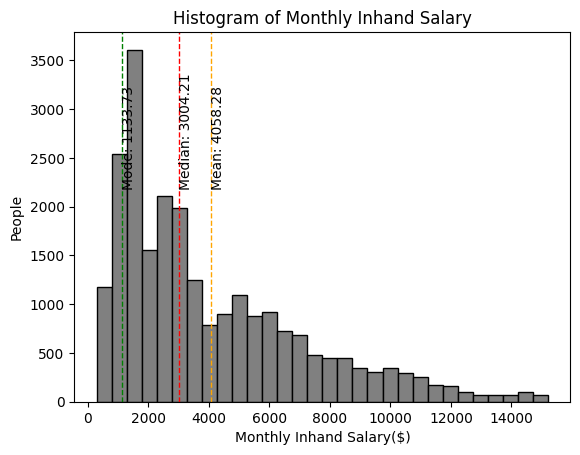

In [44]:
# отобразим на гистрограме моду, медиану и среднее значение

# Получаем данные о медиане, моде и среднем значении
median = np.median(monthly_salary) # можно и через библиотеку scipy
mode,_ = scipy.stats.mode(monthly_salary)
mean = np.mean(monthly_salary) # можно и через библиотеку scipy
# np.nanmedian() и np.nanmean() игнорируются значения NaN

# Построение гистограммы
plt.hist(monthly_salary, color='gray', edgecolor='black', bins=int(150/5))

# Добавляем медиану
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 2200, 'Median: {:.2f}'.format(median), rotation=90)

# Добавляем моду
plt.axvline(mode, color='g', linestyle='dashed', linewidth=1)
plt.text(mode, 2200, 'Mode: {:.2f}'.format(mode), rotation=90)

# Добавляем среднее значение
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=1)
plt.text(mean, 2200, 'Mean: {:.2f}'.format(mean), rotation=90)

plt.title('Histogram of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary($)')
plt.ylabel('People')


Первое св-во среднего значения:
 M(x) = 4,058.28
 M(x+1000) = 5,058.28



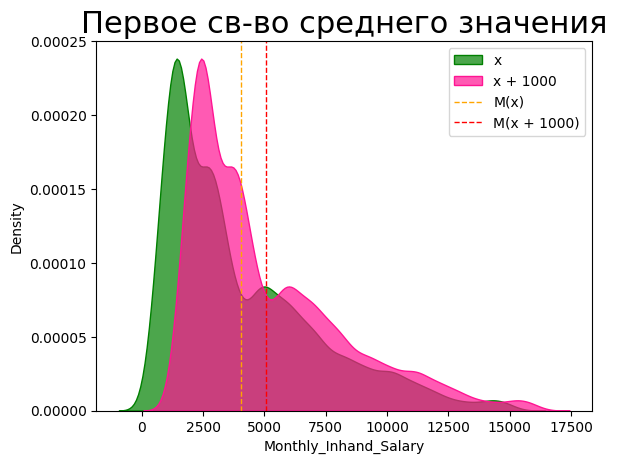

In [74]:
# демонстрация св-в среднего значения

print("Первое св-во среднего значения:\n M(x) = {:,}\n M(x+1000) = {:,}".format(round(np.mean(monthly_salary), 2), round(np.mean(monthly_salary + 1000), 2)))
print()# Объяснение почему так

# построим графики распределения для множества значений x и x+1000
# строим графики плотности для обоих случаев и отображаем на них среднее значение для каждого 

sns.kdeplot(monthly_salary, fill=True, color="g", label="x", alpha=.7)
sns.kdeplot(monthly_salary + 1000, fill=True, color="deeppink", label="x + 1000", alpha=.7)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary), 2), color='orange', label="M(x)", linestyle='dashed', linewidth=1)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary + 1000), 2), color='red', label="M(x + 1000)", linestyle='dashed', linewidth=1)

plt.title('Первое св-во среднего значения', fontsize=22)
plt.legend()


__График плотности__  

Кривая плотности — это кривая на графике, представляющая распределение значений в наборе данных.

Она помогает:

- Получить представление о «форме» распределения, в том числе о том, имеет ли распределение один или несколько «пиков» часто встречающихся значений и имеет ли распределение наклон влево или вправо.

- Визуально увидеть, где находятся среднее значение и медиана распределения.

- Увидеть, какой процент наблюдений в наборе данных попадает между разными значениями.

Второое св-во среднего значения:
 M(x) = 4,058.28
 M(x*2) = 8,116.57



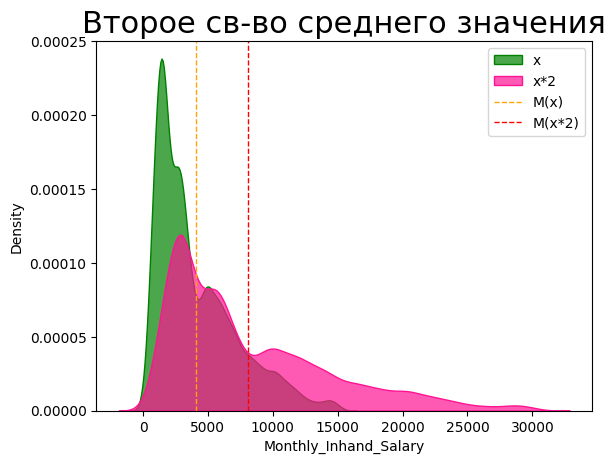

In [72]:
print("Второое св-во среднего значения:\n M(x) = {:,}\n M(x*2) = {:,}".format(round(np.mean(monthly_salary), 2), round(np.mean(monthly_salary *2), 2)))
print() # Объяснение почему так

# построим графики распределения для множества значений x и x*2
# строим графики плотности для обоих случаев и отображаем на них среднее значение для каждого 

sns.kdeplot(monthly_salary, fill=True, color="g", label="x", alpha=.7)
sns.kdeplot(monthly_salary *2, fill=True, color="deeppink", label="x*2", alpha=.7)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary), 2), color='orange', label="M(x)", linestyle='dashed', linewidth=1)

# Добавляем среднее значение
plt.axvline(round(np.mean(monthly_salary * 2), 2), color='red', label="M(x*2)", linestyle='dashed', linewidth=1)

plt.title('Второе св-во среднего значения', fontsize=22)
plt.legend()

In [55]:
# Третий признак
sum = 0
for x_i in monthly_salary:
    w = x_i - np.mean(monthly_salary)
    sum = w + sum
    
print('Третье св-во среднего значения:\n sum( x(i) - average ) =', round(sum))

Третье св-во среднего значения:
 sum( x(i) - average ) = 0


__Меры изменчивости__
- Размах - разность между максимальным и минимальным значениям выборки (чувствителен к выбросам).
- Дисперсия - это мера изменчивости данных. Чем больше дисперсия, тем больше разброс значений относительно среднего.  

для генеральной совокупности
$$D = \frac{\sum (x_i - M_{x})^2}{n}$$
для выборки
$$D = \frac{\sum (x_i - M_{x})^2}{(n-1)}$$
*Среднеквадратическое отклонение*
$$σ=\sqrt{D}$$
*Важно отметить, что среднеквадратическое отклонение для выборки обозначают по другому, sd - standart deviation*

__Св-ва дисперсии__
$$1) D_{x+c} = D_{x}$$
$$2)D_{x*c} = D_{x} + c^2$$

In [69]:
print(f'Размах: {np.ptp(monthly_salary):,.2f}')
print(f'Дисперсия: {np.var(monthly_salary, ddof=1):,.2f}')
print(f'Стандартное отклонение: {np.std(monthly_salary, ddof=1):,.2f}')

Размах: 14,900.99
Дисперсия: 9,577,489.17
Стандартное отклонение: 3,094.75


Можно заметить, что по размаху сложно сказать о изменчивости данных (из-за того, что у нас есть очень большие значения в выборке)
Стандартное отклонение же показывает более реалистичные значения (на нее не так сильно влияют выбросы)


Первое св-во дисперсии:
 D(x) = 9,577,088.92, D(x+1000) = 9,577,088.92
 x + 1000 - график распределения x просто сдвинулся на 1000 вправо, что никак не влияет на отклонения 


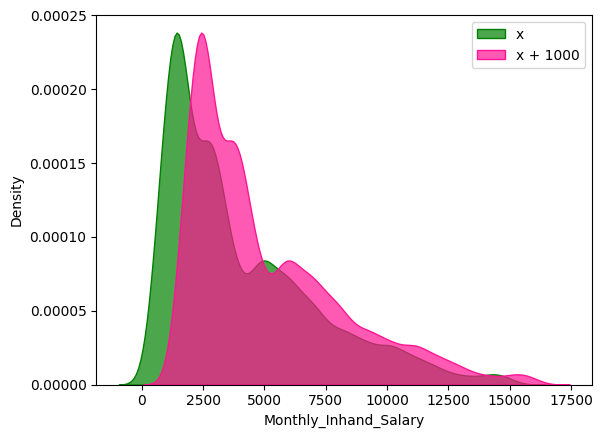

In [67]:
# Демонстрация св-в дисперсии
# первое св-во

print("Первое св-во дисперсии:\n D(x) = {:,}, D(x+1000) = {:,}".format(round(np.var(monthly_salary), 2), round(np.var(monthly_salary + 1000), 2)))
print(" x + 1000 - график распределения x просто сдвинулся на 1000 вправо, что никак не влияет на отклонения ")

sns.kdeplot(monthly_salary, fill=True, color="g", label="x", alpha=.7)
sns.kdeplot(monthly_salary + 1000, fill=True, color="deeppink", label="x + 1000", alpha=.7)
plt.legend()


Второе св-во дисперсии:
 D(x) = 9,577,088.92, D(x*2) = 38,308,355.7
дисперсия увеличилась в 4 раза
x*2 - график распределения x растянулся 


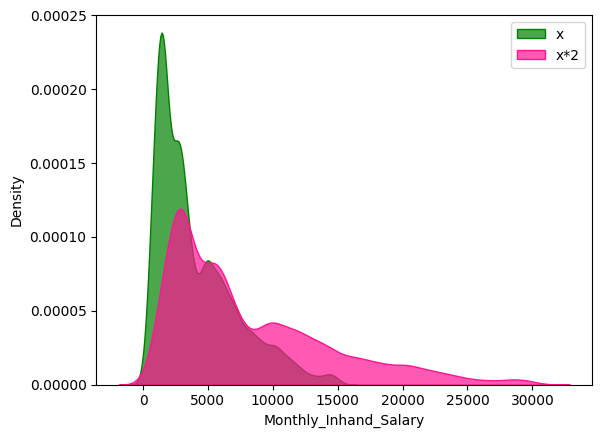

In [81]:
# Демонстрация св-в дисперсии
# второе св-во

print("Второе св-во дисперсии:\n D(x) = {:,}, D(x*2) = {:,}".format(round(np.var(monthly_salary), 2), round(np.var(monthly_salary*2), 2)))
print("дисперсия увеличилась в 4 раза\nx*2 - график распределения x растянулся ")

sns.kdeplot(monthly_salary, fill=True, color="g", label="x", alpha=.7)
sns.kdeplot(monthly_salary*2, fill=True, color="deeppink", label="x*2", alpha=.7)
plt.legend()

__Квартили распределения__  

__Квантили__ - значения, которые делят ряд наблюдений на равные части  
__Квартили__ - это три точки(значения признака), которые делят упорядочное множество данных на 4 равных части

Квартили и inter quartile range используют, чтобы оценить наличие выбросов. Алгоритм расчета - посчитали квартили, посчитали разницу между ними, вычислили теоретический максимум и минимум, сравнили с имеющимся и выяснили есть ли у вас выбросы и сколько их. Если много, то нужно анализировать и решать брать ли их в выборку или нет.

__Box plot__ - такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы

[ 1598.54583333 15204.63333333  1598.54583333]
1598.54583333333
15204.6333333333
1598.54583333333


Text(0.5, 1.0, 'Квартили')

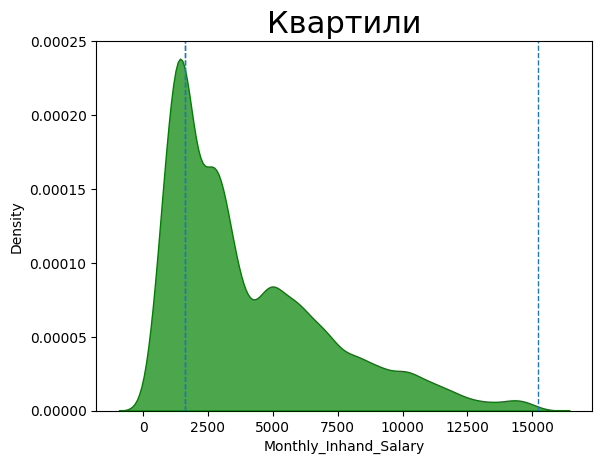

In [106]:
# расчет квартилей
quart = np.quantile(monthly_salary, [0.25, 1, 0.25])
print(quart)

# отображение квартилей на графике

sns.kdeplot(monthly_salary, fill=True, color="g", label="x", alpha=.7)

for i in quart:
    print(i)
    plt.axvline(round(i), linestyle='dashed', linewidth=1)

plt.title('Квартили', fontsize=22)


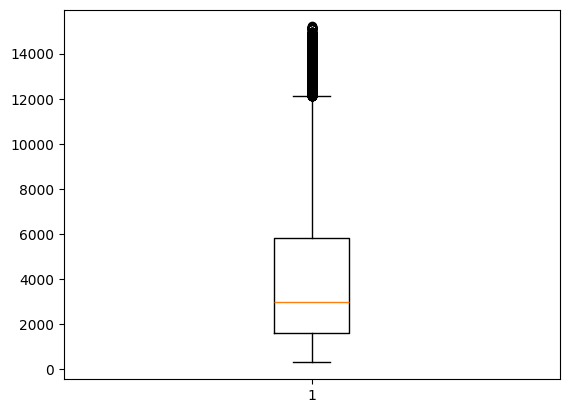

In [100]:
# построение графика boxplot
plt.boxplot(monthly_salary, showfliers=1);

Нормальное распределение
Нормальное распределение
Коротко

Унимодально
Симметрично
Отклонения наблюдений от среднего подчиняются определённому вероятностному закону
Подробно

Нормальное распределение возникает в результате воздействия множества факторов, вклад каждого из которых очень мал.

Для облегчения этого восприятия в 1873 году Фрэнсис Гальтон сделал устройство, которое в последствии назвали Доской Галтона (или квинкункс). Суть простая: сверху по середине подаются шарики, которые при прохождении нескольких уровней (например, 10-ти) на каждом уровне сталкиваются с препятствием, и при каждом столкновении отскакивают либо влево, либо вправо (с равной вероятностью).

Как вы догадываетесь, результатом прохождения - это распределение, стремящееся к нормальному!

Стандартизация

Правило двух и трех сигм, использование стандартизации

In [79]:
# TODO:
# пройтись по функциям (расписать, что они делают по отдельности)
# квартили
# нормальное распределение
